## 합성곱 신경망

### 간단한 커브넷 만들기

In [2]:
from keras import models, layers

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', 
                        input_shape = (28, 28, 1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', 
                        input_shape = (28, 28, 1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

### MNIST 이미지에 컨브넷 훈련해보기

#### 데이터 불러오기

In [12]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [26]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

#### 데이터 준비
- 이미지 데이터 input_size 조정 및 스케일링
- label 데이터 원핫인코딩

In [18]:
import matplotlib.pyplot as plt

()


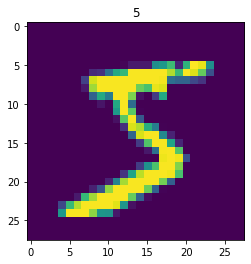

In [19]:
plt.imshow(train_data[0])
plt.title(train_labels[0])
plt.show()

In [27]:
# 이미지 스케일링
train_data = train_data.reshape((60000, 28, 28, 1))
train_data = train_data.astype('float32')/255

test_data = test_data.reshape(((10000, 28, 28, 1)))
test_data = test_data.astype('float32')/255

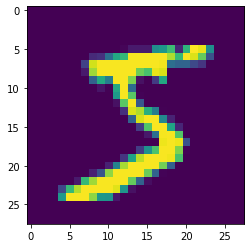

In [29]:
plt.imshow(train_data[0])

In [30]:
# 레이블 원핫인코딩
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [31]:
# 모델 컴파일
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# 학습
model.fit(train_data, train_labels,
          epochs = 5,
          batch_size = 64)


Epoch 1/5
938/938 [==============================] - 59s 63ms/step - loss: 0.1723 - accuracy: 0.9461
Epoch 2/5
938/938 [==============================] - 59s 63ms/step - loss: 0.0461 - accuracy: 0.9853
Epoch 3/5
938/938 [==============================] - 58s 62ms/step - loss: 0.0325 - accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 61s 65ms/step - loss: 0.0244 - accuracy: 0.9929
Epoch 5/5
938/938 [==============================] - 60s 64ms/step - loss: 0.0200 - accuracy: 0.9937


In [32]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

print(f'test loss: {test_loss:.3f} \ntest accuracy: {test_acc:.3f}')

313/313 [==============================] - 4s 11ms/step - loss: 0.0348 - accuracy: 0.9905
test loss: 0.035 
test accuracy: 0.990


### 각 네트워크 층별로 시각화해보기

In [47]:
# 모델의 입력 텐서

model.input

<tf.Tensor 'conv2d_3_input:0' shape=(None, 28, 28, 1) dtype=float32>

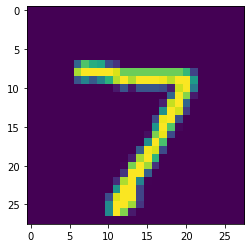

In [42]:
plt.imshow(test_data[0])

In [33]:
# 네트워크 층 별 출력 텐서

layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<tf.Tensor 'conv2d_3/Relu:0' shape=(None, 26, 26, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(None, 13, 13, 32) dtype=float32>,
 <tf.Tensor 'conv2d_4/Relu:0' shape=(None, 11, 11, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_3/MaxPool:0' shape=(None, 5, 5, 64) dtype=float32>,
 <tf.Tensor 'conv2d_5/Relu:0' shape=(None, 3, 3, 64) dtype=float32>,
 <tf.Tensor 'flatten_2/Reshape:0' shape=(None, 576) dtype=float32>,
 <tf.Tensor 'dense_3/Relu:0' shape=(None, 64) dtype=float32>,
 <tf.Tensor 'dense_4/Softmax:0' shape=(None, 10) dtype=float32>]

In [49]:
# 입력 데이터에 대해 모든 층의 출력을 반환하는 모델 만들기
activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
print(activation_model)


# 예측 모드로 모델 실행하기
activations = activation_model.predict(test_data)
activations

[array([[[[0.        , 0.02010691, 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.02010691, 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.02010691, 0.        , ..., 0.        ,
           0.        , 0.        ],
          ...,
          [0.        , 0.02010691, 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.02010691, 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.02010691, 0.        , ..., 0.        ,
           0.        , 0.        ]],
 
         [[0.        , 0.02010691, 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.02010691, 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.02010691, 0.        , ..., 0.        ,
           0.        , 0.        ],
          ...,
          [0.        , 0.02010691, 0.        , ..., 0.        ,
   

In [52]:
# 인덱싱 = 층 인덱스와 같음
activations[0].shape, activations[1].shape, activations[2].shape, 

((10000, 26, 26, 32), (10000, 13, 13, 32), (10000, 11, 11, 64))

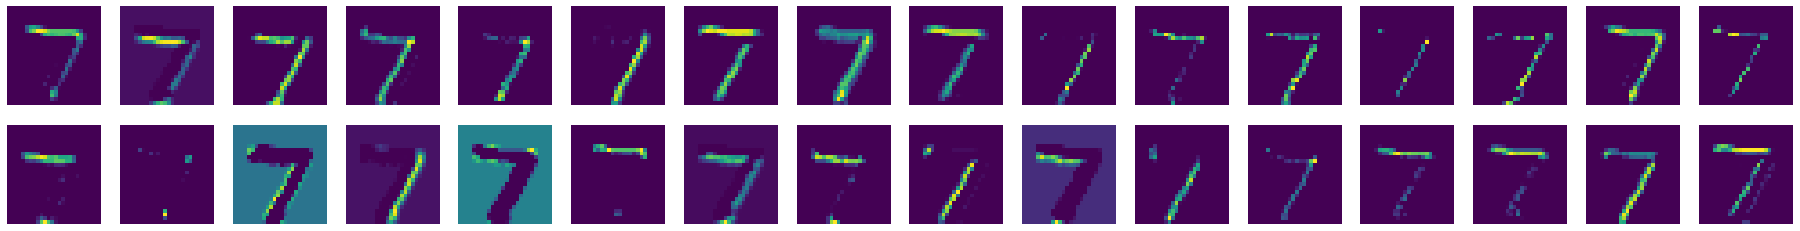

In [87]:
# 시각화 테스트
plt.figure(figsize = (32, 4))
for i in range(32):
    plt.subplot(2, 16, i + 1)
    plt.axis('off')
    plt.imshow(activations[0][0,:,:,i], aspect = 'auto', cmap = 'viridis')
    
plt.show()

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [88]:
# 단계별로 시각화 사용자 함수 생성

def layer_visualization(layer_outputs, activations, n, test_img_n):
    n_layer = layer_outputs[n]
    print(f'### {n+1}번째 layer: [{n_layer.name}]')
    
    # 층의 채널개수
    n_channels = activations[n].shape[3]
    
    # 행의 개수 세기
    nrow = n_channels//16 if n_channels%16 == 0 else n_channels//8 + 1
    
    # 모든 채널 시각화
    plt.figure(figsize = (32, 2 * nrow))
    for i in range(n_channels):
        plt.subplot(nrow, 16, i + 1)
        plt.axis('off')
        plt.imshow(activations[n][test_img_n,:,:,i])
    plt.show()

### 1번째 layer: [conv2d_3/Relu:0]


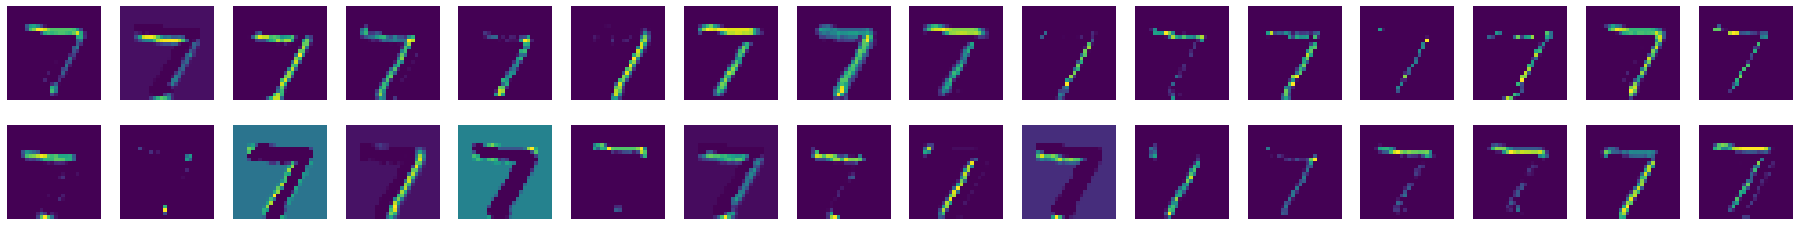

### 2번째 layer: [max_pooling2d_2/MaxPool:0]


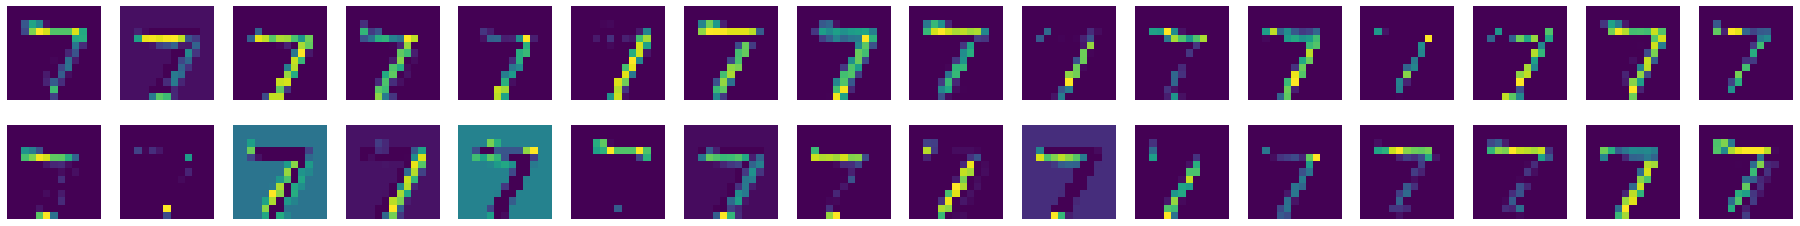

### 3번째 layer: [conv2d_4/Relu:0]


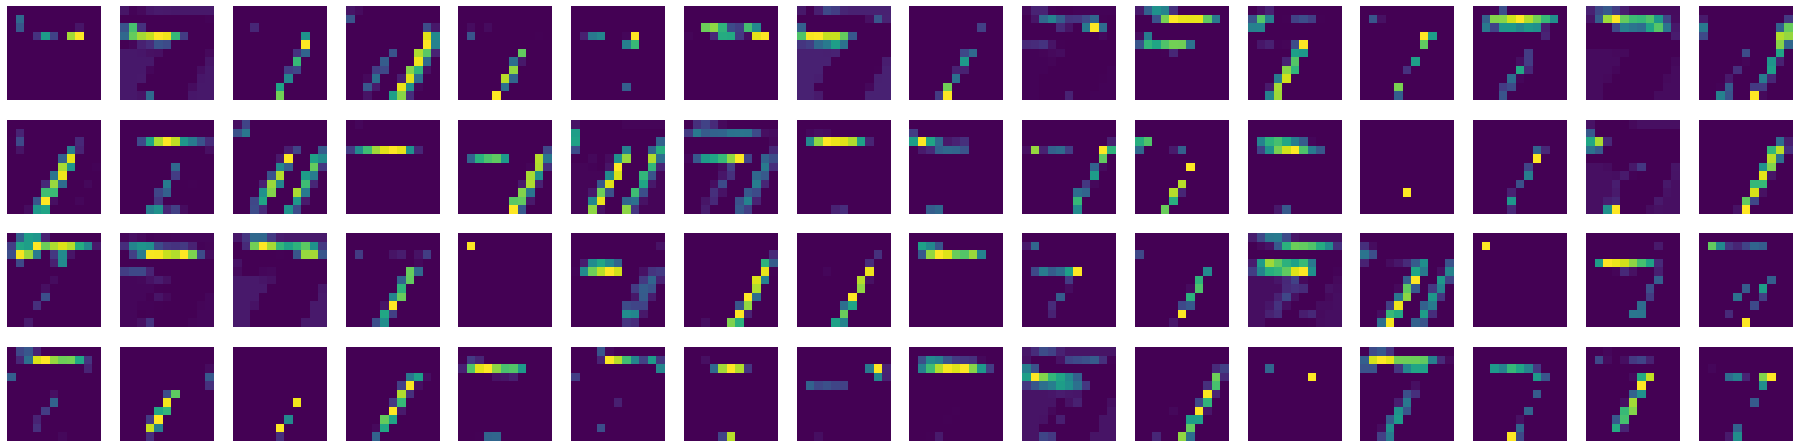

### 4번째 layer: [max_pooling2d_3/MaxPool:0]


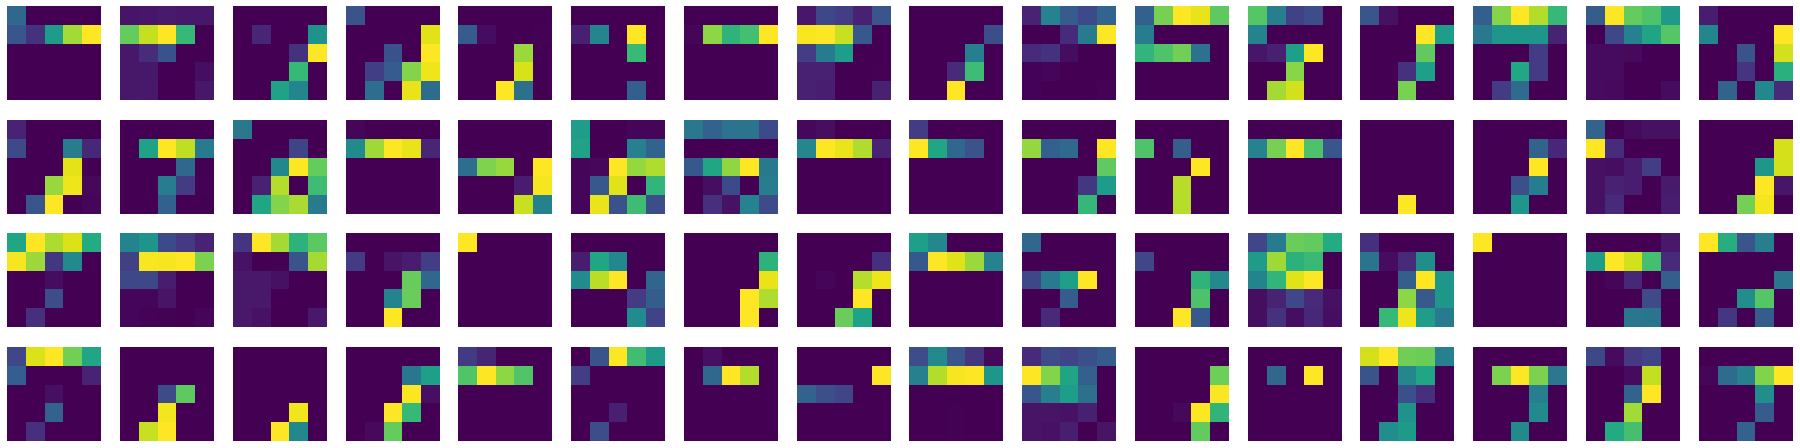

### 5번째 layer: [conv2d_5/Relu:0]


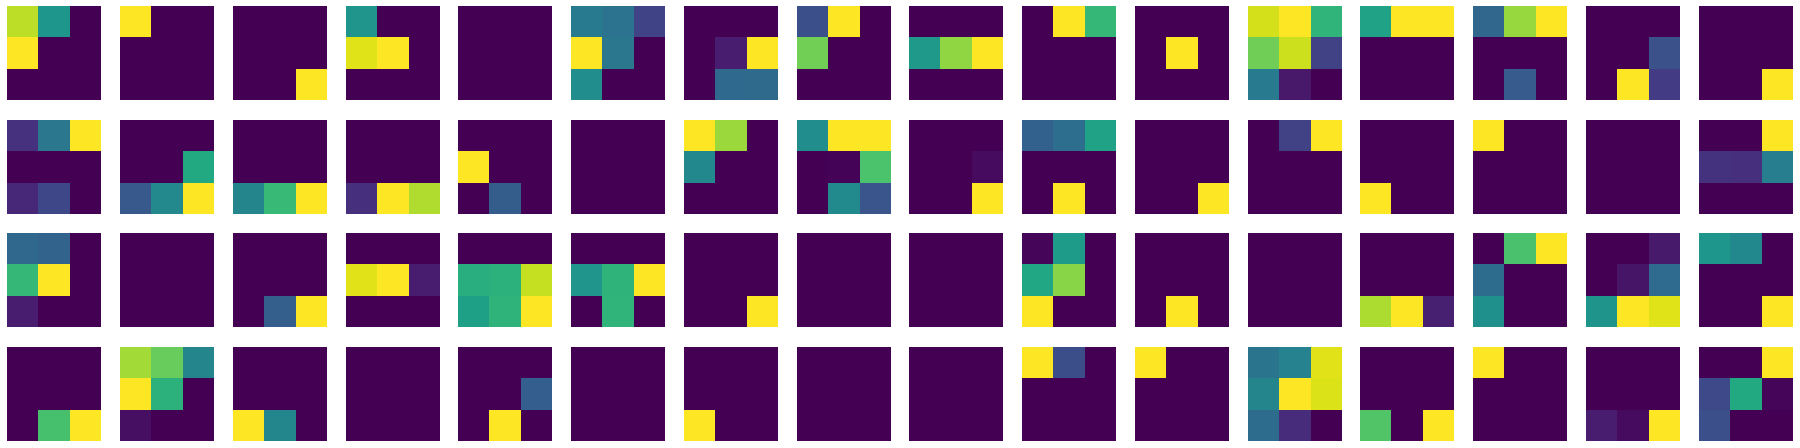

In [90]:
for i in range(len(layer_outputs[:5])):
    layer_visualization(layer_outputs, activations, i, 0)